# Prior estimation

In [1]:
include("src/main.jl")
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

In [2]:
# enable pyplot-latex
PyCall.PyDict(PyPlot.matplotlib["rcParams"])["text.usetex"] = true

true

## The Model

In [3]:
n = 200
ndata = 100
σ = .5
prior = Uniform(0,2)

Distributions.Uniform{Float64}(a=0.0, b=2.0)

In [4]:
srand(5)
m = FEModel(f=x->x, xs=linspace(0,2,n), σ=σ)
mt = FEModel(f=x->x, xs=linspace(0,1,n), σ=σ)
d = generatedata(m, prior, ndata);

In [5]:
ncv = 20
#kfold = length(d);
kfold = 10

10

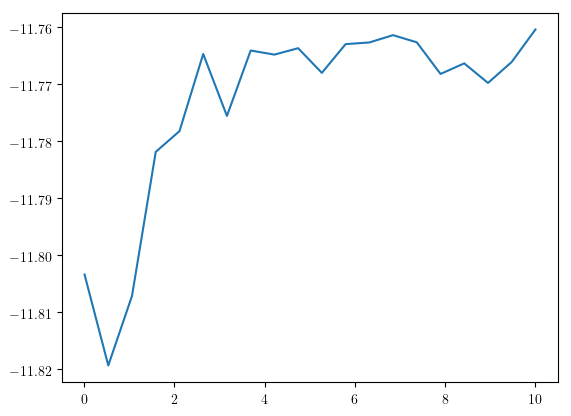

8.158923 seconds (17.64 M allocations: 10.700 GiB, 12.62% gc time)


10.0

In [6]:
## er estimator
regs = [ReferenceRegularizer(m, γ) for γ in linspace(0.01,10,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regR = regs[indmax(ss)].γ

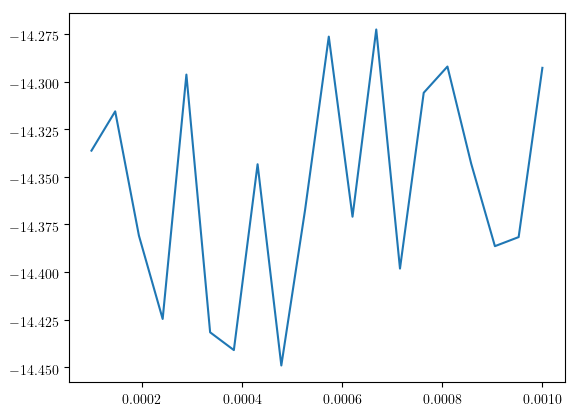

138.615957 seconds (28.49 M allocations: 233.386 GiB, 17.49% gc time)


0.000668421052631579

In [7]:
## er estimator
regs = [ReferenceRegularizer(mt, γ) for γ in linspace(0.0001,0.001,ncv)]
@time ss = [cvscore(mt, d, d->ebprior(mt, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regRt = regs[indmax(ss)].γ

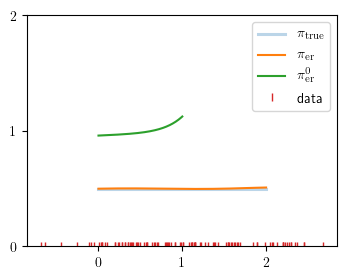

regR = 10.0


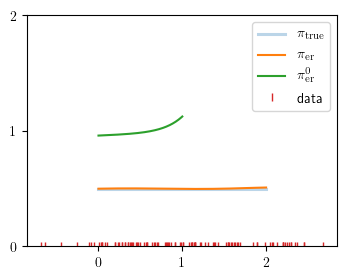

In [38]:
@show regR
wr  = ebprior(m,  d, ReferenceRegularizer(m,  regR))
wrt = ebprior(mt, d, ReferenceRegularizer(mt, regR))

figure(figsize=(4,3))
plot([0,2],[0.5,.5], label="\$\\pi_{\\rm true}\$", alpha=.3, linewidth=2.2)
plot(m.xs, wr/2*n, label="\$\\pi_{\\rm er}\$")
plot(mt.xs, wrt*n, label="\$\\pi^0_{\\rm er}\$")
plot(d, zeros(d), marker="|", linestyle=" ", label="data")

ylim(0,2)

yticks([0,1,2])
xticks([0,1,2])
legend()
#vlines(0,1,2)
savefig("counterex.pdf", bbox_inches="tight")
p=gcf()

In [9]:
using MAT
function plt2mat(p, filename)
    d = [(filter(isalpha, l[:get_label]()), hcat(l[:get_data]()...)) for a in p[:axes] for l in a[:lines] ] |> Dict
    matwrite(filename, d)
end

plt2mat (generic function with 1 method)

In [40]:
plt2mat(p, "counterex.mat")